<a href="https://colab.research.google.com/github/ramgopaltks/gripnov20tasks/blob/main/GRIPNOV20_Task2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: Ramgopal Selvaraj**

**Task 1 : Prediction using Unsupervised Machine Learning**

In this task we are about to predict the optimum number of clusters from the given Iris dataset and representing it visually.


In [87]:
# Importing all libraries required in this notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets


Reading data from remote link and storing it in a dataframe

In [88]:
# Load the iris dataset
iris = datasets.load_iris()
inp_data = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Data was loaded into a DataFrame successfully")

Data was loaded into a DataFrame successfully


Printing the sample data from the DataFrame to check how the data looks alike

In [89]:
inp_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [90]:
inp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Determine the size of the DataFrame and check the DataFrame for any null values

In [91]:
print("The dataset has the below number of columns and rows in total :  ")
print(inp_data.shape)
print()

print("The dataset has the below number of NULL values by columnwise :  ")
inp_data.isna().sum()

The dataset has the below number of columns and rows in total :  
(150, 4)

The dataset has the below number of NULL values by columnwise :  


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Generating descriptive statistics by using the **describe** method which includes **mean, median, standard deviation, minimum, maximum, 25th, 50th 75th percentiles**.

**NOTE:** "(include = 'all')" will describe all columns of a DataFrame regardless of data type.

In [92]:
inp_data.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Finding the optimum number of clusters for K-means and determining the value of K**

K-means is one of the most widely used unsupervised clustering methods.

### **THE ELBOW METHOD**
The Elbow method is a heuristic method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset.

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.


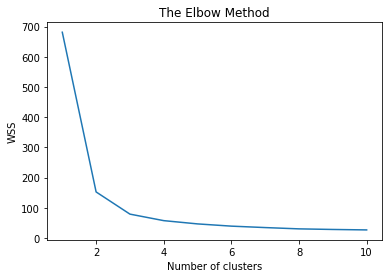

In [93]:
#Finding the optimum number of clusters for K-means

x = inp_data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allows us to observe 'The Elbow'
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS') # Within-Cluster-Sum of Squared Errors
plt.show()

From the above line graph the number of clusters can be determined as 3.

In [94]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)  

Visualising the clusters on the first two columns

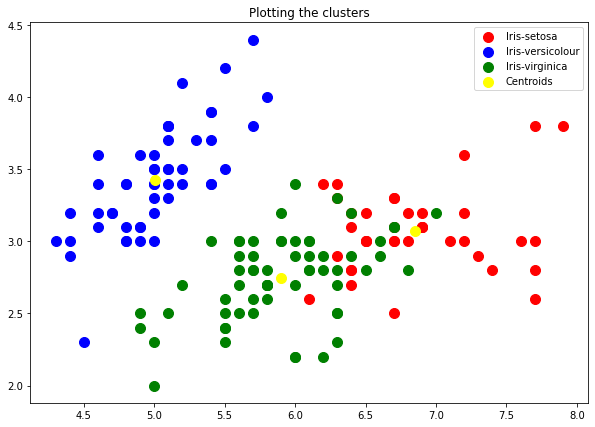

In [95]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.title('Plotting the clusters')

plt.show()